# Lista 3


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [22]:
random_state = 222

## zad 1

Implementuję regresję liniową z jedną zmienną za pomocą metody **najmniejszych kwadratów (OLS)**, bez korzystania z bibliotek typu `scikit-learn`, ale korzystając z wykładu. Moim celem jest:

- wygenerowanie danych syntetycznych,
- obliczenie współczynników $\hat{\beta}$ zgodnie z wzorem OLS:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

Rozpoczynam od generowania. Model, według którego generuję dane, to:

$$
y = \beta_1 x + \beta_0
$$

Gdzie:

- $\beta_1 = 3.5$, rzeczywisty współczynnik kierunkowy,
- $\beta_0 = 1.2$, rzeczywisty wyraz wolny (intercept).

Dane są idealnie liniowe, bez składnika losowego $\varepsilon$.

In [23]:
np.random.seed(random_state)
n = 143
X = 2 * np.random.rand(n)

beta_1 = 3.5
beta_0 = 3

y = beta_1 * X + beta_0

Algorytm OLS

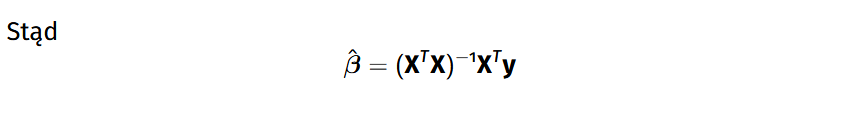

ważny element:

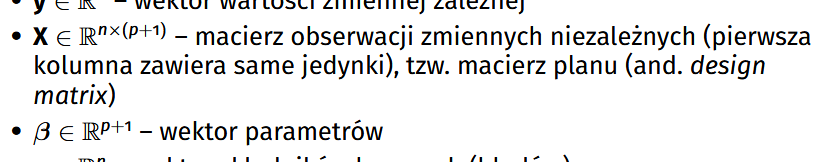

In [24]:
def ex1_ols(X, y):
    ones_column = np.ones((n, 1))
    Xmatrix = np.hstack((ones_column, X.reshape(-1, 1)))

    # Obliczamy (X^T X)
    XtX = Xmatrix.T @ Xmatrix

    # Obliczamy (X^T y)
    Xty = Xmatrix.T @ y

    beta_hat = np.linalg.inv(XtX) @ Xty
    beta_hat

    return beta_hat

beta_hat = ex1_ols(X, y)
beta_hat

array([3. , 3.5])

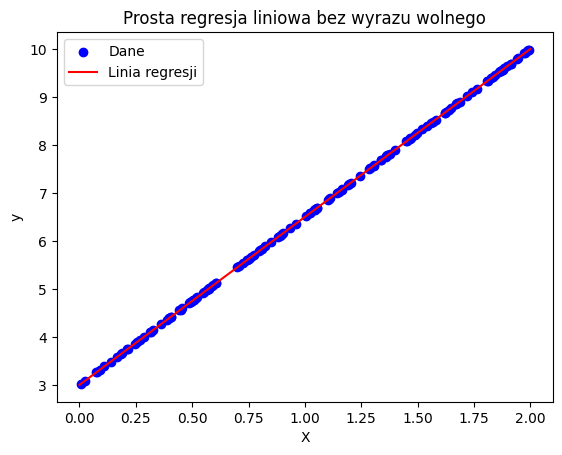

In [25]:
X_line = np.linspace(0, 2, 100).reshape(-1,1)
y_line = beta_hat[1] * X_line + beta_hat[0]

plt.scatter(X, y, color='blue', label='Dane')
plt.plot(X_line, beta_hat[1] * X_line + beta_hat[0], color='red', label='Linia regresji')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Prosta regresja liniowa bez wyrazu wolnego')
plt.legend()
plt.show()

## zad 2

Używam klasy `LinearRegression` z biblioteki `scikit-learn` do rozwiązania problemu z zadania 1. Porównuję uzyskane współczynniki z własną implementacją OLS. Następnie, używam publicznie dostępnego zbioru danych Boston Housing do zbudowania modelu regresji wielokrotnej.

In [26]:
sklearn_model = LinearRegression()
sklearn_model.fit(X.reshape(-1, 1), y)

print("Współczynniki z scikit-learn:")
print(f"Beta 0: {sklearn_model.intercept_:.6f}")
print(f"Beta 1: {sklearn_model.coef_[0]:.6f}")

print("=============")

print("Współczynniki z własnej implementacji OLS:")
print(f"Beta 0: {beta_hat[0]:.6f}")
print(f"Beta 1: {beta_hat[1]:.6f}")

print("=============")

print("Różnice:")
print(f"Intercept różnica: {abs(sklearn_model.intercept_ - beta_hat[0])}")
print(f"Slope różnica: {abs(sklearn_model.coef_[0] - beta_hat[1])}")


Współczynniki z scikit-learn:
Beta 0: 3.000000
Beta 1: 3.500000
Współczynniki z własnej implementacji OLS:
Beta 0: 3.000000
Beta 1: 3.500000
Różnice:
Intercept różnica: 3.1086244689504383e-15
Slope różnica: 5.329070518200751e-15


Wrzucam to na wykres

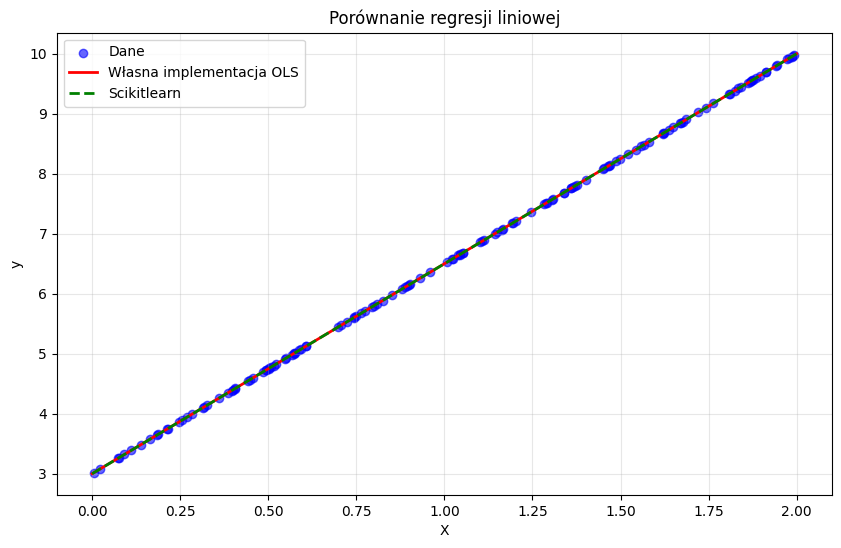

In [27]:
y_sklearn = sklearn_model.predict(X_line)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Dane')
plt.plot(X_line, y_line, color='red', linewidth=2, label='Własna implementacja OLS')
plt.plot(X_line, y_sklearn, color='green', linewidth=2, linestyle='--', label='Scikitlearn')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Porównanie regresji liniowej')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Teraz test na większym datasecie

Używam zbioru danych Boston Housing do zbudowania modelu. Ten zbiór zawiera informacje o cenach domów w Bostonie oraz różne cechy, które mogą wpływać na cenę.

In [28]:
df_boston = pd.read_csv('./assets/HousingData.csv')
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


To co widzimy, to:

| Column name | Description |
|--------------|-------------|
| CRIM | per capita crime rate by town |
| ZN | proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS | proportion of non-retail business acres per town |
| CHAS | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX | nitric oxides concentration (parts per 10 million) |
| RM | average number of rooms per dwelling |
| AGE | proportion of owner-occupied units built prior to 1940 |
| DIS | weighted distances to five Boston employment centers |
| RAD | index of accessibility to radial highways |
| TAX | full-value property-tax rate per $10,000 |
| PTRATIO | pupil-teacher ratio by town |
| B | 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town |
| LSTAT | % lower status of the population |
| MEDV | Median value of owner-occupied homes in $1000’s |


In [29]:
nan_count = df_boston.isna().any(axis=1).sum()
print(f"liczba brakujących wartości w kolumnach: {nan_count} na {df_boston.shape[0]} wierszy")

liczba brakujących wartości w kolumnach: 112 na 506 wierszy


In [30]:
df_boston.dropna(inplace=True)

In [31]:
X_boston = df_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y_boston = df_boston['MEDV']

In [32]:
boston_model = LinearRegression()
boston_model.fit(X_boston, y_boston)

LinearRegression()

## zad 3

Obliczam i interpretuję podstawowe metryki oceny:

- **MSE (Mean Squared Error)** - średni błąd kwadratowy
- **RMSE (Root Mean Squared Error)** - pierwiastek średniego błędu kwadratowego  
- **MAE (Mean Absolute Error)** - średni błąd bezwzględny
- **R^2 (R-squared)** - współczynnik determinacji

Jak czytać te miary:
- **MSE/RMSE**: Im niższy, tym lepszy model
- **MAE**: średni błąd bezwzględny (bardziej odporny na wartości odstające niż MSE)
- **R^2**: przedział 0-1 (im wyższe tym lepsze)


Wzory  dla metryk:

**MSE**
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**RMSE**
$$
RMSE = \sqrt{MSE}
$$

**MAE**
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

**R^2:**
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Gdzie:
- $y_i$ - rzeczywiste wartości
- $\hat{y}_i$ - predykcje modelu
- $\bar{y}$ - średnia z rzeczywistych wartości
- $n$ - liczba próbek
